In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pycaret.classification import setup, compare_models

In [4]:
file_path = 'titanic.csv'
data = pd.read_csv(file_path)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Variables d'apprentissage
- pclass
- sex
- Age
- sibsp
- parch
- ticket
- fare
- cabin
- embarked

## Variables cible

- Survived

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Imputer les valeurs manquantes
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Cabin'] = data['Cabin'].fillna('Unknown')

# Détecter les valeurs aberrantes pour le tarif (Fare) en utilisant l'IQR
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
outliers = data[(data['Fare'] < lower_bound) | (data['Fare'] > upper_bound)]
print("Valeurs aberrantes détectées :")
print(outliers)

# Supprimer les valeurs aberrantes
data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

# Afficher un aperçu des données nettoyées
data.head()

Valeurs aberrantes détectées :
     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  28.0      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Unknown,Q


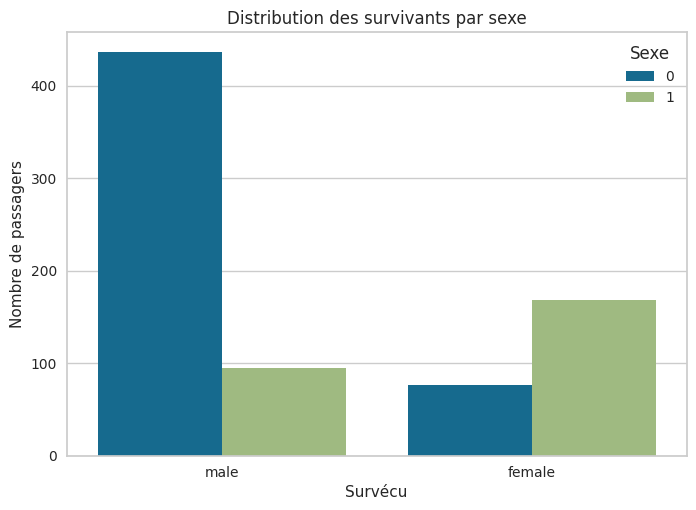

In [30]:
# Distribution des survivants par sexe
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('Distribution des survivants par sexe')
plt.xlabel('Survécu')
plt.ylabel('Nombre de passagers')
plt.legend(title='Sexe', loc='upper right')
plt.show()

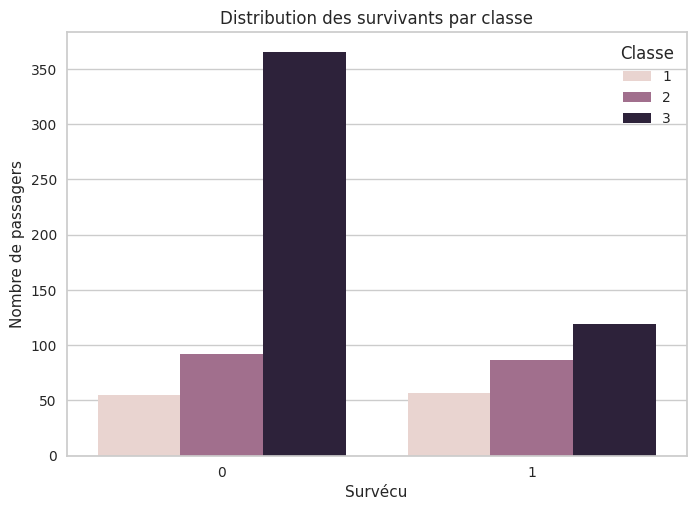

In [23]:
# Distribution des survivants par classe
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Distribution des survivants par classe')
plt.xlabel('Survécu')
plt.ylabel('Nombre de passagers')
plt.legend(title='Classe', loc='upper right')
plt.show()

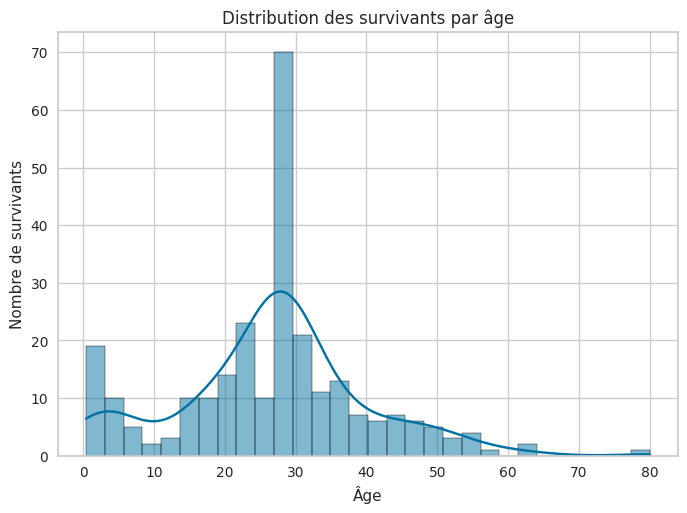

In [24]:
# Distribution des survivants par âge
sns.histplot(data[data['Survived'] == 1]['Age'], kde=True, bins=30)
plt.title('Distribution des survivants par âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de survivants')
plt.show()

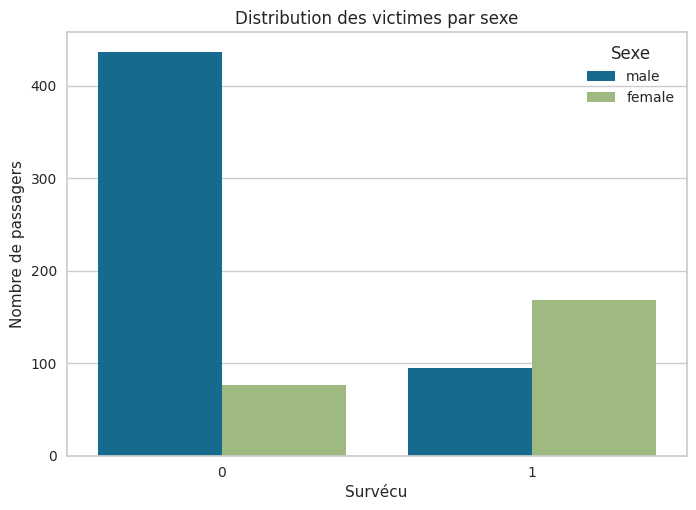

In [25]:
# Distribution des victimes par sexe
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Distribution des victimes par sexe')
plt.xlabel('Survécu')
plt.ylabel('Nombre de passagers')
plt.legend(title='Sexe', loc='upper right')
plt.show()

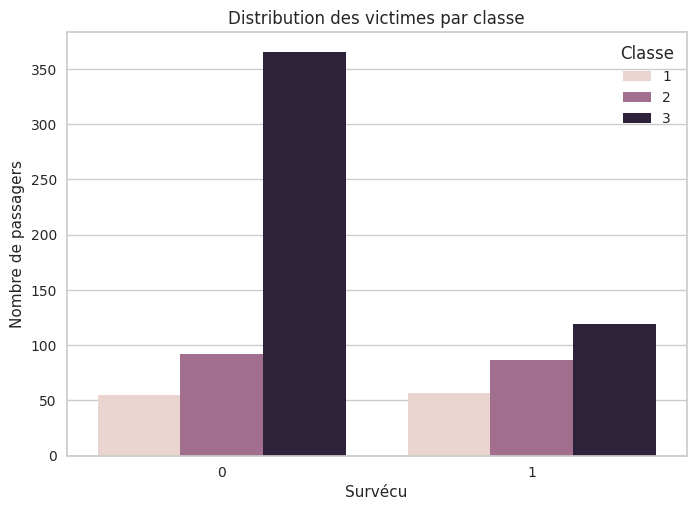

In [26]:
# Distribution des victimes par classe
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Distribution des victimes par classe')
plt.xlabel('Survécu')
plt.ylabel('Nombre de passagers')
plt.legend(title='Classe', loc='upper right')
plt.show()

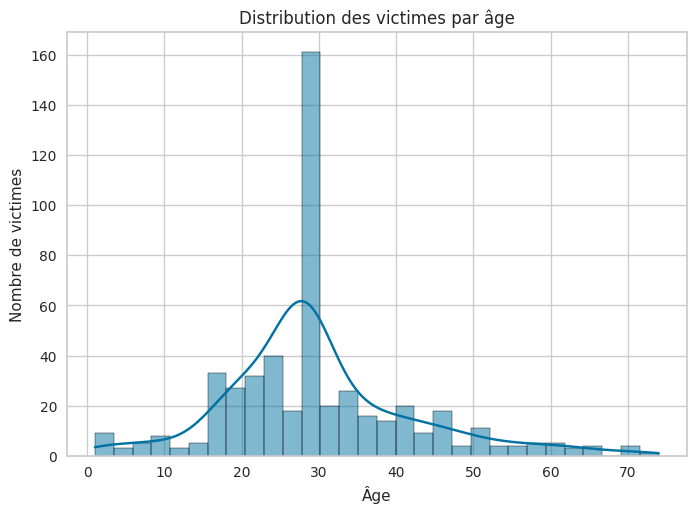

In [27]:
# Distribution des victimes par âge
sns.histplot(data[data['Survived'] == 0]['Age'], kde=True, bins=30)
plt.title('Distribution des victimes par âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de victimes')
plt.show()

In [16]:
exp_clf = setup(data, target='Survived', session_id=123)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(775, 12)"
4,Transformed data shape,"(775, 14)"
5,Transformed train set shape,"(542, 14)"
6,Transformed test set shape,"(233, 14)"
7,Numeric features,6
8,Categorical features,5
9,Preprocess,True


In [17]:
# Comparer les modèles de classification
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8135,0.8469,0.6249,0.8041,0.6946,0.5641,0.5802,0.2940
ridge,Ridge Classifier,0.7379,0.8373,0.2611,0.8915,0.3970,0.2929,0.3831,0.0210
et,Extra Trees Classifier,0.7084,0.7383,0.2509,0.7159,0.3588,0.2289,0.2840,0.0590
nb,Naive Bayes,0.6882,0.7642,0.0985,0.8167,0.1706,0.1139,0.2108,0.0250
dt,Decision Tree Classifier,0.6605,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0270
rf,Random Forest Classifier,0.6605,0.7851,0.0000,0.0000,0.0000,0.0000,0.0000,0.0710
gbc,Gradient Boosting Classifier,0.6605,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0380
ada,Ada Boost Classifier,0.6605,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0350
lda,Linear Discriminant Analysis,0.6605,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0210
lightgbm,Light Gradient Boosting Machine,0.6605,0.4708,0.0000,0.0000,0.0000,0.0000,0.0000,32.6910
